In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ler os dados do DataFrame, especificando o ponto e vírgula como separador e ignorando a primeira linha como cabeçalho
df = pd.read_csv('C:\\Users\\User\\Downloads\\train_churn.csv', sep=';', header=None, skiprows=1)


# Renomear as colunas
new_columns = ['ID', 'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'TempoDeServico', 'ServicoTelefone', 'MultiLinhas',
               'ServicoInternet', 'ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos', 'ServicoSuporteTecnico',
               'StreamingTV', 'StreamingFilmes', 'Contrato', 'BillingDigital', 'MetodoPagamento', 'FaturaMensal',
               'FaturaTotal', 'NumTickets', 'NumTicketsTecnico', 'Churn']
df.columns = new_columns

display(df)

,ID,Genero,Idoso,Parceiro,Dependentes,TempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3151,Masculino,0.0,NaN,Sim,15.0,Sim,Não,Fibra óptica,Sim,...,Não,Não,Mensal,Não,Cheque por Carta,75.10,1151.55,4.0,0.0,0.0
4996,4502,Masculino,0.0,Não,Não,55.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,96.80,5283.95,NaN,4.0,1.0
4997,3077,Masculino,0.0,Sim,Não,45.0,Sim,Não,NaN,Sim,...,Não,Não,2 Anos,Não,Cartão de Crédito (Automático),53.30,2296.25,0.0,0.0,0.0
4998,3798,Masculino,0.0,Não,Não,42.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,100.30,4222.95,0.0,0.0,0.0


# Pré processamento de dados

In [3]:
def preprocessamento(df):
    # Calculando e preenchendo valores nulos em 'TempoDeServico' e 'FaturaMensal'
    df['TempoDeServico'] = df['TempoDeServico'].fillna(df['TempoDeServico'].mean())
    df['FaturaMensal'] = df['FaturaMensal'].fillna(df['FaturaMensal'].mean())
    # Preenchendo valores nulos em 'Idoso' com a moda

    df['Idoso'] = df['Idoso'].fillna(df['Idoso'].mode()[0])

    # Mapeando 'Sim' para 1 e 'Não' para 0 em diversas colunas
    mapeamentos = {
        'Genero' : {'Masculino': 1, 'Feminino': 0},
        'Parceiro': {'Sim': 1, 'Não': 0},
        'Dependentes': {'Sim': 1, 'Não': 0},
        'ServicoTelefone': {'Sim': 1, 'Não': 0},
        'MultiLinhas': {'Sim': 1, 'Não': 0, 'Sem serviço de telefone': 0},
        'ServicoInternet': {'Fibra óptica': 1, 'Não': 0, 'DSL': 1},
        'ServicoSegurancaCyber': {'Sim': 1, 'Não': 0, 'Sem serviço de internet': 0},
        'ServicoBackup': {'Sim': 1, 'Não': 0, 'Sem serviço de internet': 0},
        'SeguroDispositivos': {'Sim': 1, 'Não': 0, 'Sem serviço de internet': 0},
        'ServicoSuporteTecnico': {'Sim': 1, 'Não': 0, 'Sem serviço de internet': 0},
        'StreamingTV': {'Sim': 1, 'Não': 0, 'Sem serviço de internet': 0},
        'StreamingFilmes': {'Sim': 1, 'Não': 0, 'Sem serviço de internet': 0},
        'BillingDigital' : {'Sim': 1, 'Não': 0},
        'Contrato' : {'Mensal': 1, '1 Ano': 0, '2 Anos': 0} #Mensal = 1; anual (1 ou 2 anos) = 0
    }
    for coluna, mapeamento in mapeamentos.items():
        df[coluna] = df[coluna].map(mapeamento)

    return df

In [4]:
df2 = preprocessamento(df)

In [5]:
df2['MetodoPagamento'].value_counts()

MetodoPagamento
Cheque Eletrônico                      1583
Cheque por Carta                       1095
Transferência Bancária (Automática)    1045
Cartão de Crédito (Automático)         1033
Name: count, dtype: int64

In [6]:
def classificaPagamento(df2, coluna):
  map = {'Cheque Eletrônico': 1, 'Cheque por Carta': 1, 'Cartão de Crédito': 0, 'Trasferência Bancária': 0}
  df[coluna] = df[coluna].map(map)

In [7]:
classificaPagamento(df2, 'MetodoPagamento')

In [8]:
df2['MetodoPagamento']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4995    1.0
4996    1.0
4997    NaN
4998    1.0
4999    NaN
Name: MetodoPagamento, Length: 5000, dtype: float64

In [9]:
# Substituir espaços em branco por NaN na coluna 'FaturaTotal'
df2['FaturaTotal'] = df2['FaturaTotal'].replace(' ', np.nan)
# Converter a coluna para float
df2['FaturaTotal'] = df2['FaturaTotal'].astype(float)

In [10]:
columns_mode = ['Parceiro','Contrato', 'Dependentes','ServicoTelefone','Genero','MultiLinhas',
                  'ServicoInternet', 'ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos',
                  'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'BillingDigital', 'NumTickets',
                  'NumTicketsTecnico','Churn', 'MetodoPagamento']

for coluna in columns_mode:
    df2[coluna] = df2[coluna].fillna(df2[coluna].mode().iloc[0])

In [11]:
columns_mean = ['FaturaMensal', 'FaturaTotal','TempoDeServico']

for column in columns_mean:
  df2[columns_mean] = df2[columns_mean].fillna(df2[columns_mean].mean())

In [12]:
df2.isnull().sum()

ID                       0
Genero                   0
Idoso                    0
Parceiro                 0
Dependentes              0
TempoDeServico           0
ServicoTelefone          0
MultiLinhas              0
ServicoInternet          0
ServicoSegurancaCyber    0
ServicoBackup            0
SeguroDispositivos       0
ServicoSuporteTecnico    0
StreamingTV              0
StreamingFilmes          0
Contrato                 0
BillingDigital           0
MetodoPagamento          0
FaturaMensal             0
FaturaTotal              0
NumTickets               0
NumTicketsTecnico        0
Churn                    0
dtype: int64

In [13]:
df2

,ID,Genero,Idoso,Parceiro,Dependentes,TempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,1.0,0.0,1.0,1.0,35.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,25.45,809.25,0.0,0.0,0.0
1,1961,0.0,0.0,0.0,0.0,42.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,60.15,2421.60,0.0,0.0,0.0
2,5308,0.0,0.0,0.0,0.0,69.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,82.45,5555.30,0.0,0.0,0.0
3,3587,1.0,1.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,99.45,919.40,0.0,0.0,1.0
4,576,1.0,0.0,1.0,1.0,31.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,98.05,3082.10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3151,1.0,0.0,0.0,1.0,15.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,75.10,1151.55,4.0,0.0,0.0
4996,4502,1.0,0.0,0.0,0.0,55.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,96.80,5283.95,0.0,4.0,1.0
4997,3077,1.0,0.0,1.0,0.0,45.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,53.30,2296.25,0.0,0.0,0.0
4998,3798,1.0,0.0,0.0,0.0,42.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,100.30,4222.95,0.0,0.0,0.0


# Aplicando modelos e realizando Grid Search 

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [15]:
X = df2.drop(columns=['Churn'])
y = df2['Churn']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Random Forest

In [16]:
# Definir os parâmetros para o grid search do Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar o classificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar o GridSearchCV para o Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Executar o grid search para o Random Forest
grid_search_rf.fit(X_train, y_train)

# Melhor modelo após o grid search
best_rf = grid_search_rf.best_estimator_

# Prever os rótulos do conjunto de teste
y_pred = best_rf.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Melhores parâmetros encontrados
print("Best Parameters:", grid_search_rf.best_params_)

Accuracy: 0.8373333333333334
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### MultiLayer Classifier

In [17]:
# Definir os parâmetros para o grid search do MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}

# Inicializar o classificador MLPClassifier
mlp = MLPClassifier(random_state=42)

# Inicializar o GridSearchCV para o MLPClassifier
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)

# Executar o grid search para o MLPClassifier
grid_search_mlp.fit(X_train, y_train)

# Melhor modelo após o grid search
best_mlp = grid_search_mlp.best_estimator_

# Prever os rótulos do conjunto de teste
y_pred = best_mlp.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Melhores parâmetros encontrados
print("Best Parameters:", grid_search_mlp.best_params_)

Accuracy: 0.8
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


### Decision Tree

In [18]:
# Definir os parâmetros para o grid search da Árvore de Decisão
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar o classificador Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)

# Inicializar o GridSearchCV para a Árvore de Decisão
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Executar o grid search para a Árvore de Decisão
grid_search_dt.fit(X_train, y_train)

# Melhor modelo após o grid search
best_dt = grid_search_dt.best_estimator_

# Prever os rótulos do conjunto de teste
y_pred = best_dt.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Melhores parâmetros encontrados
print("Best Parameters:", grid_search_dt.best_params_)

Accuracy: 0.7913333333333333
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


### Adaboost

In [19]:
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Inicializar o classificador AdaBoost
adaboost = AdaBoostClassifier(random_state=42)

# Inicializar o GridSearchCV para o AdaBoost
grid_search_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid_adaboost, cv=5, scoring='accuracy', n_jobs=-1)

# Executar o grid search para o AdaBoost
grid_search_adaboost.fit(X_train, y_train)

# Melhor modelo após o grid search
best_adaboost = grid_search_adaboost.best_estimator_

# Prever os rótulos do conjunto de teste
y_pred = best_adaboost.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Melhores parâmetros encontrados
print("Best Parameters:", grid_search_adaboost.best_params_)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8426666666666667
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}


### Navie Bayes

In [20]:
# Definir os parâmetros para o grid search (não há parâmetros para o Naive Bayes, isso é apenas para fins de demonstração)
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # var_smoothing é um parâmetro específico para lidar com zero variações
}

# Inicializar o classificador Naive Bayes Gaussian
nb = GaussianNB()

# Inicializar o GridSearchCV para o Naive Bayes
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')

# Executar o grid search para o Naive Bayes
grid_search_nb.fit(X_train, y_train)

# Melhor modelo após o grid search
best_nb = grid_search_nb.best_estimator_

# Prever os rótulos do conjunto de teste
y_pred = best_nb.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Melhores parâmetros encontrados (não há parâmetros para o Naive Bayes)
print("Best Parameters:", grid_search_nb.best_params_)

Accuracy: 0.8246666666666667
Best Parameters: {'var_smoothing': 1e-07}


### Gráfico da acurácia de cada modelo

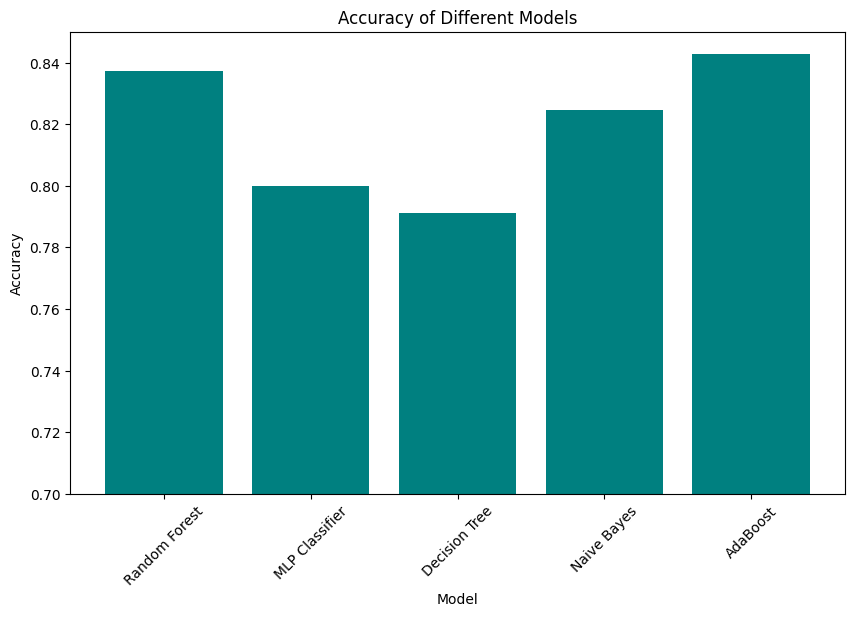

Random Forest:
  Accuracy: 0.8373333333333334
  Precision: 0.7156549520766773
  Recall: 0.5910290237467019
  F1 Score: 0.6473988439306358
MLP Classifier:
  Accuracy: 0.8
  Precision: 0.6076294277929155
  Recall: 0.5883905013192612
  F1 Score: 0.5978552278820375
Decision Tree:
  Accuracy: 0.7913333333333333
  Precision: 0.5921787709497207
  Recall: 0.5593667546174143
  F1 Score: 0.5753052917232022
Naive Bayes:
  Accuracy: 0.8246666666666667
  Precision: 0.7
  Recall: 0.5356200527704486
  F1 Score: 0.6068759342301944
AdaBoost:
  Accuracy: 0.8426666666666667
  Precision: 0.712166172106825
  Recall: 0.633245382585752
  F1 Score: 0.6703910614525139


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Definir os modelos e as predições
models = {
    'Random Forest': best_rf,
    'MLP Classifier': best_mlp,
    'Decision Tree': best_dt,
    'Naive Bayes': best_nb,
    'AdaBoost': best_adaboost
}

# Calcular as métricas para cada modelo
metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Plotar o gráfico de barras mostrando a acurácia de cada modelo
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), [metric['Accuracy'] for metric in metrics.values()], color='teal')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0.7, 0.85)
plt.show()

# Exibir as métricas de cada modelo
for name, metric in metrics.items():
    print(f'{name}:')
    print(f'  Accuracy: {metric["Accuracy"]}')
    print(f'  Precision: {metric["Precision"]}')
    print(f'  Recall: {metric["Recall"]}')
    print(f'  F1 Score: {metric["F1 Score"]}')

### Modelo escolhido

### Adaboost
# Treinando novamente o modelo com os melhores hiperparâmetros

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Definir os melhores parâmetros encontrados durante o grid search
best_params = {'n_estimators': 50, 'learning_rate': 1.0}

# Inicializar o classificador AdaBoost com os melhores parâmetros
best_adaboost = AdaBoostClassifier(**best_params, random_state=42)

# Treinar o modelo com os melhores parâmetros
best_adaboost.fit(X_train, y_train)

# Prever os rótulos do conjunto de teste
y_pred = best_adaboost.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Melhores parâmetros encontrados
print("Best Parameters:", best_params)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8426666666666667
Best Parameters: {'n_estimators': 50, 'learning_rate': 1.0}


In [24]:
from sklearn.metrics import classification_report

# Prever os rótulos do conjunto de teste
y_pred = best_adaboost.predict(X_test)

# Imprimir o classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      1121
         1.0       0.71      0.63      0.67       379

    accuracy                           0.84      1500
   macro avg       0.80      0.77      0.78      1500
weighted avg       0.84      0.84      0.84      1500



### Cálculo e gráfico bias-variance


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecat

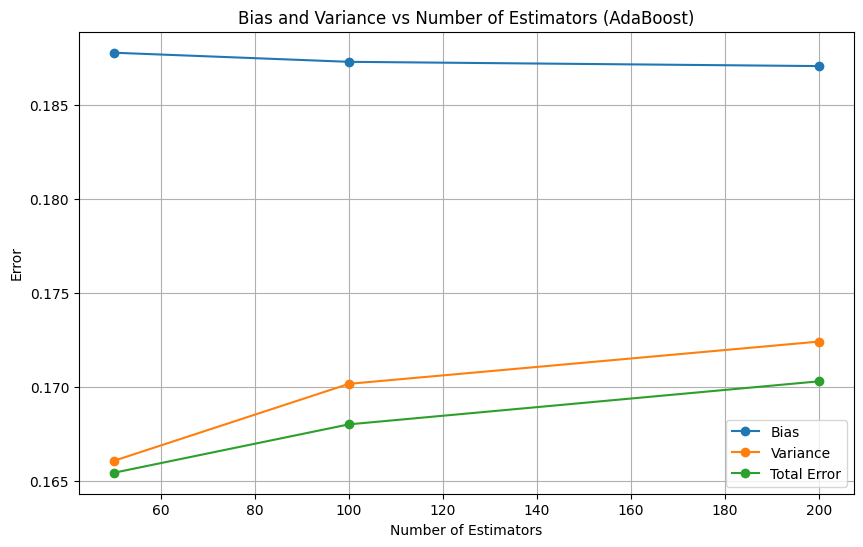

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

# Definir a faixa de número de estimadores
n_estimators_range = [50, 100, 200]

# Listas para armazenar os valores de viés, variância e erro total
biases = []
variances = []
errors = []

# Loop sobre a faixa de número de estimadores
for n_estimators in n_estimators_range:
    # Inicializar o classificador AdaBoost com o número de estimadores atual
    adaboost_model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=1.0, random_state=42)

    # Obter as previsões do modelo usando validação cruzada estratificada
    y_pred = cross_val_predict(adaboost_model, X_train, y_train, cv=5)

    # Calcular viés, variância e erro médio
    mean_prediction = np.mean(y_pred)
    bias = np.mean((mean_prediction - y_train) ** 2)
    variance = np.mean((y_pred - mean_prediction) ** 2)
    error = mean_squared_error(y_train, y_pred)

    # Adicionar os valores às listas
    biases.append(bias)
    variances.append(variance)
    errors.append(error)

# Plotar o gráfico de viés e variância em função do número de estimadores
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, biases, label='Bias', marker='o')
plt.plot(n_estimators_range, variances, label='Variance', marker='o')
plt.plot(n_estimators_range, errors, label='Total Error', marker='o')
plt.title('Bias and Variance vs Number of Estimators (AdaBoost)')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

### Validação cruzada e avaliação de desempenho

In [32]:
from sklearn.model_selection import cross_val_score

# Usando 10-fold cross-validation
cv_scores = cross_val_score(best_adaboost, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores)}, Standard Deviation: {np.std(cv_scores)}')

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecat

Cross-Validation Accuracy Scores: [0.84  0.87  0.852 0.808 0.832 0.856 0.834 0.848 0.84  0.822]
Mean Accuracy: 0.8402, Standard Deviation: 0.016767826334978538


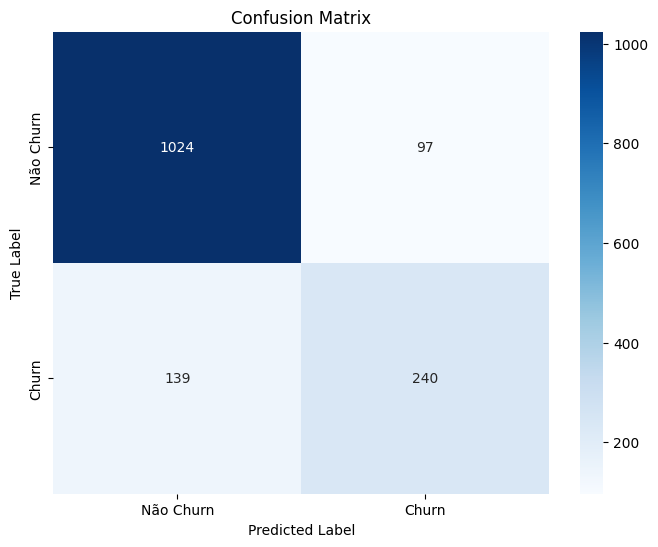

In [36]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Análise de importância das features para o modelo

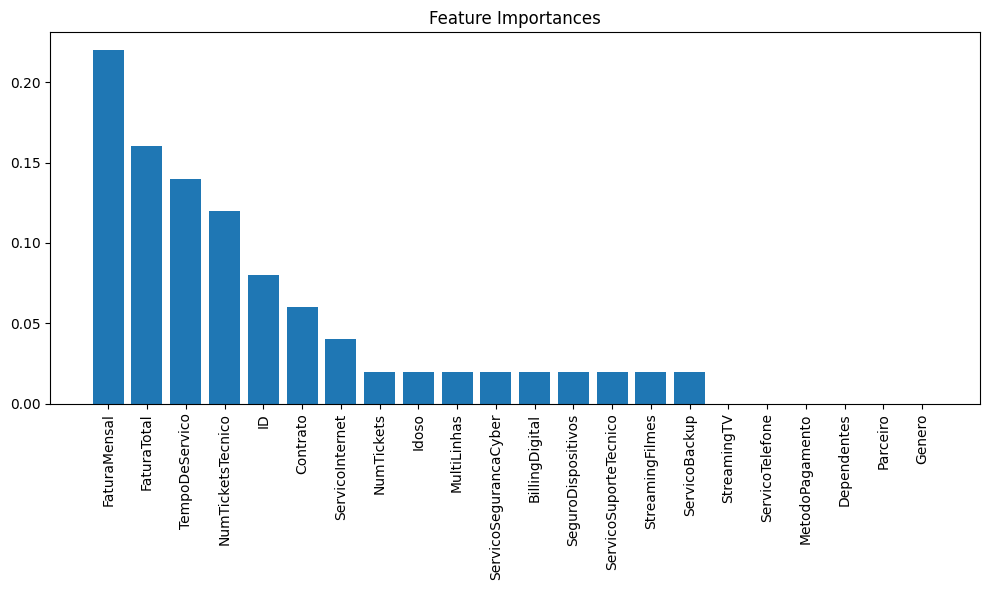

In [33]:
importances = best_adaboost.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

- Neste gráfico podemos ver com clareza quais features são mais influentes na previsão do modelo